In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

In [11]:
!wget -O image_1.jpg https://cdn.newspenguin.com/news/photo/202309/15029_46710_214.jpg
!wget -O image_2.jpg https://dimg.donga.com/wps/NEWS/IMAGE/2019/09/27/97615710.3.jpg

--2025-01-21 05:49:37--  https://cdn.newspenguin.com/news/photo/202309/15029_46710_214.jpg
Resolving cdn.newspenguin.com (cdn.newspenguin.com)... 101.235.211.88
Connecting to cdn.newspenguin.com (cdn.newspenguin.com)|101.235.211.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180921 (177K) [image/jpeg]
Saving to: ‘image_1.jpg’

image_1.jpg         100%[===================>] 176.68K   179KB/s    in 1.0s    

2025-01-21 05:49:40 (179 KB/s) - ‘image_1.jpg’ saved [180921/180921]

--2025-01-21 05:49:40--  https://dimg.donga.com/wps/NEWS/IMAGE/2019/09/27/97615710.3.jpg
Resolving dimg.donga.com (dimg.donga.com)... 1.248.254.84, 1.248.254.68, 1.248.254.70
Connecting to dimg.donga.com (dimg.donga.com)|1.248.254.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64639 (63K) [image/jpeg]
Saving to: ‘image_2.jpg’

image_2.jpg         100%[===================>]  63.12K   258KB/s    in 0.2s    

2025-01-21 05:49:41 (258 KB/s) - ‘image_2.jpg’ sav

In [13]:
image_1 = cv2.imread('image_1.jpg')
image_2 = cv2.imread('image_2.jpg')

if image_1 is None or image_2 is None:
    print("이미지 로드 실패. 이미지 파일 경로를 확인하세요.")
else:
  if image_1.shape != image_2.shape:
    image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

  cv2_imshow(image_1)
  cv2_imshow(image_2)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
if image_1 is not None and image_2 is not None:
  result_saturation = cv2.add(image_1, image_2)
  cv2_imshow(result_saturation)

  result_modulo = image_1 + image_2
  cv2_imshow(result_modulo)
else:
  print('이미지를 불러오지 못했습니다.')

Output hidden; open in https://colab.research.google.com to view.

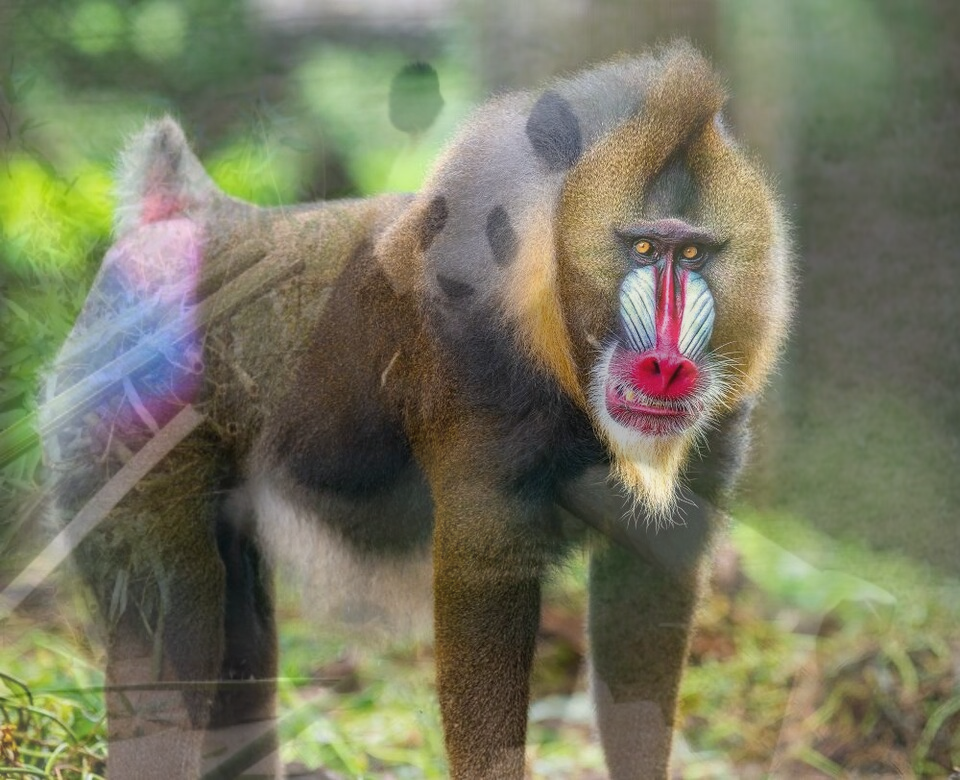

In [17]:
if image_1 is not None and image_2 is not None:
  blended = cv2.addWeighted(
      image_1, 0.7,
      image_2, 0.3,
      0
  )
  cv2_imshow(blended)
else:
  print('이미지를 불러오지 못했습니다.')

In [18]:
if image_1 is not None and image_2 is not None:
  h, w = image_1.shape[:2]

  mask = np.zeros((h, w), dtype=np.uint8)
  center = (w // 2, h // 2)
  radius = min(h, w) // 4
  cv2.circle(mask, center, radius, 255, -1)

  mask_3channel = cv2.merge([mask, mask, mask])

  image_1_masked = cv2.bitwise_and(image_1, mask_3channel)
  mask_inv = cv2.bitwise_not(mask_3channel)
  image_2_background = cv2.bitwise_and(image_2, mask_inv)

  combined = cv2.add(image_1_masked, image_2_background)

  cv2_imshow(mask_3channel)
  cv2_imshow(image_1_masked)
  cv2_imshow(image_2_background)
  cv2_imshow(combined)
else:
  print('이미지를 불러오지 못했습니다.')

Output hidden; open in https://colab.research.google.com to view.

In [19]:
if image_1.shape[0] > image_2.shape[0]:
  image_1 = cv2.resize(image_1, (image_2.shape[1], image_2.shape[0]))
else:
  image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

if image_1 is not None and image_2 is not None:
  result_saturation = cv2.add(image_1, image_2)
  cv2_imshow(result_saturation)

  result_modulo = image_1 + image_2
  cv2_imshow(result_modulo)
else:
  print('이미지를 불러오지 못했습니다.')

Output hidden; open in https://colab.research.google.com to view.

0.7


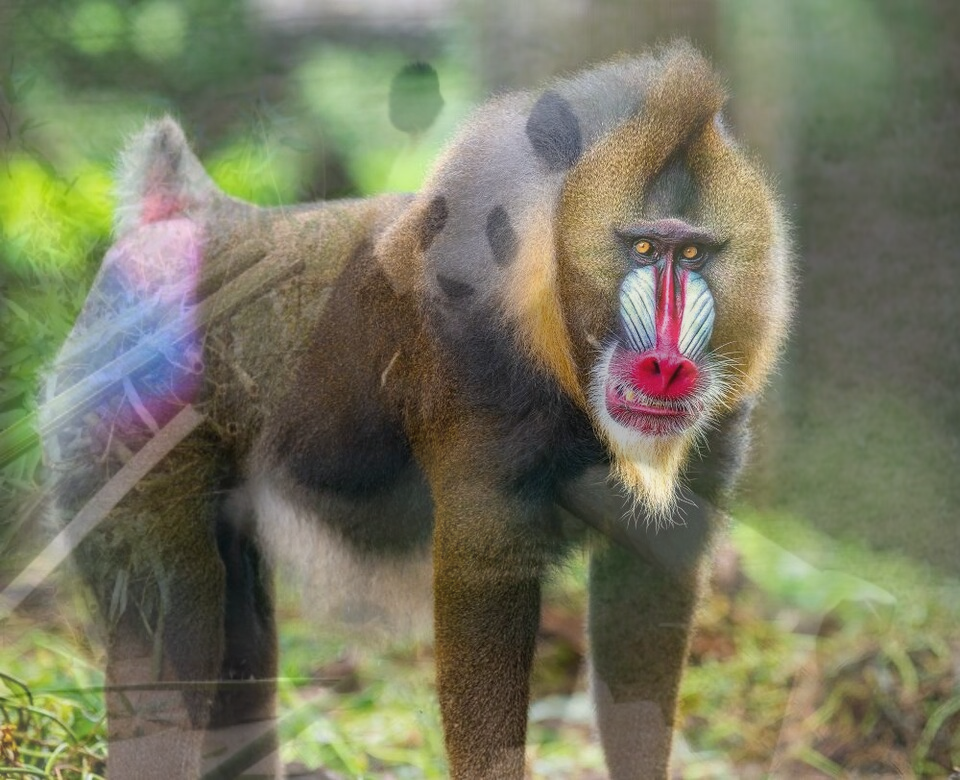

In [20]:
alpha = float(input())

if image_1 is not None and image_2 is not None:
  blended = cv2.addWeighted(
      image_1, alpha,
      image_2, 1 - alpha,
      0
  )
  cv2_imshow(blended)
else:
  print('이미지를 불러오지 못했습니다.')

In [24]:
if image_1 is not None and image_2 is not None:
  h, w = image_1.shape[:2]

  mask = np.zeros((h, w), dtype=np.uint8)
  center = (w // 2, h // 2)
  cv2.rectangle(mask, (20, 20), (w - 20, h - 20), 255, -1)

  mask_3channel = cv2.merge([mask, mask, mask])

  image_1_masked = cv2.bitwise_and(image_1, mask_3channel)
  mask_inv = cv2.bitwise_not(mask_3channel)
  image_2_background = cv2.bitwise_and(image_2, mask_inv)

  combined = cv2.add(image_1_masked, image_2_background)

  cv2_imshow(mask_3channel)
  cv2_imshow(image_1_masked)
  cv2_imshow(image_2_background)
  cv2_imshow(combined)
else:
  print('이미지를 불러오지 못했습니다.')

Output hidden; open in https://colab.research.google.com to view.